In [1]:
import random
from matplotlib import pyplot as plt
from numpy import random as rand
import numpy as np
import math

In [2]:

def initializePoints(count):
    points = []
    for i in range(int(count/3)):
         points.append([random.gauss(0,10),random.gauss(100,10)])
    for i in range(int(count/3)):
         points.append([random.gauss(-30,20),random.gauss(10,10)])
    for i in range(int(count/3)):
         points.append([random.gauss(30,20),random.gauss(10,10)])

    return points


In [3]:
def change(prev, current): #to compute change in previous and current centroids
    prev = np.array(prev); current = np.array(current)
    return np.linalg.norm(prev-current)

def cluster(points,K,visuals = True):
    clusters=[]
    
    #Your kmeans code will go here to cluster given points in K clsuters. If visuals = True, the code will also plot graphs to show the current state of clustering
    xPoints, yPoints = np.array([i[0] for i in points]), np.array([i[1] for i in points])
    centroids = np.array([points[i] for i in rand.randint(0, len(points), K)]) #random centroids
    prevCentroids = np.zeros(shape=(3,2))
    changeInCentroids = change(prevCentroids, centroids)
    iteration = 0
    while changeInCentroids > 0: #stopping condition
        iteration+=1
        changeInCentroids = change(prevCentroids, centroids)
        cluster = dict([(c, []) for c in range(len(centroids))])
        for p in range(len(points)):
            belongsTo = dict()
            minDistanceCentroid = np.argmin([((xPoints[p] - c[0]) ** 2 + (yPoints[p] - c[1]) ** 2) ** 0.5 
                                             for c in centroids]) #index of nearest centroid
            #belongsTo[points[p]] = centroids[minDistanceCentroid] 
            cluster[minDistanceCentroid].append(points[p])
        prevCentroids = centroids.copy()
        newCentroids = [0]*K
        for i in range(K):
            newCentroids[i] = np.mean(cluster[i], axis = 0)
        centroids = newCentroids.copy()
        if visuals:
            for i in range(K):
                plt.scatter(*zip(*cluster[i]), alpha = 0.4)
                plt.plot(centroids[i][0], centroids[i][1], 'kX', markersize=10, label="clusters")
            plt.legend()
            plt.title("{0} points clustered into {1} clusters after {1} iterations".format(len(points), K, iteration))
            plt.show()
        clusters = [cluster[i] for i in range(K)]
    return clusters

In [4]:
def SSE(clusters):
    centroids = np.array([np.mean(clusters[i], axis = 0) for i in range(len(clusters))])
    distances = np.array([clusters[i] - centroids[i] for i in range(len(clusters))])
    squaredDistances = np.array([np.linalg.norm(distances[i])**2 for i in range(len(clusters))])
    return np.sum(squaredDistances)

In [5]:
def clusterQuality(clusters):
    score = SSE(clusters)
    return score

In [8]:
def keepClustering(points, K, N, visuals):
    clusters = []
    minimumScore, minimumScoreCluster = math.inf, None
    for i in range(N):
        clusters = cluster(points, K, visuals = False)
        centroids = np.array([np.mean(clusters[i], axis = 0) for i in range(len(clusters))])
        plt.figure()
        for c in clusters:
            plt.scatter(*zip(*c), alpha = 0.4)
        plt.plot([centroids[i][0] for i in range(K)], [centroids[i][1] for i in range(K)], 'kX', markersize=10, label="clusters")
        plt.legend()
        plt.title("{0} points clustered into {1} clusters in iteration number {2}".format(len(points), K, i))
        plt.show()
        score = clusterQuality(clusters)
        if score < minimumScore: 
            minimumScore = score
            mininumScoreCluster = clusters
    return clusters
    

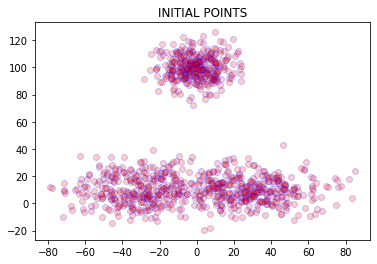

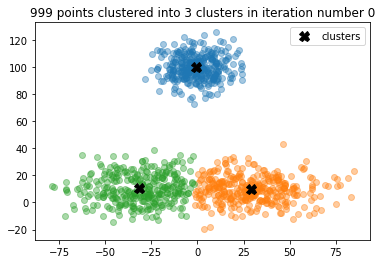

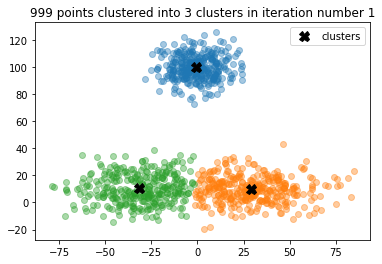

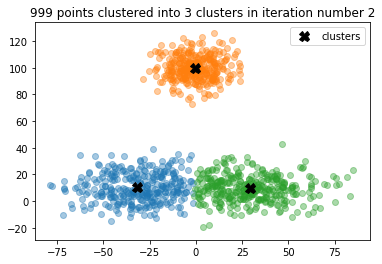

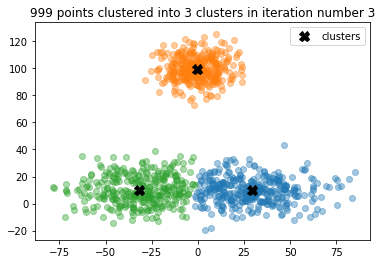

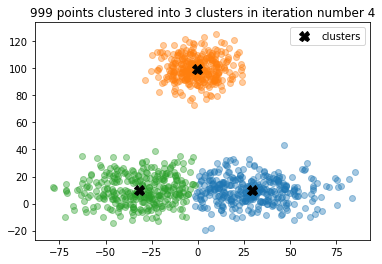

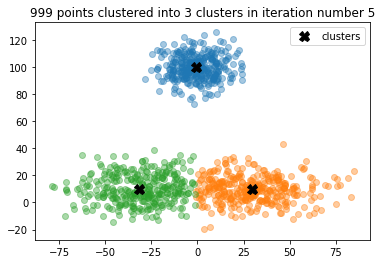

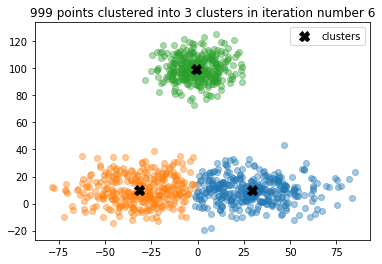

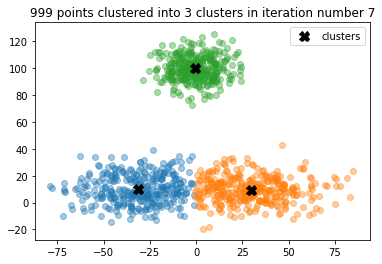

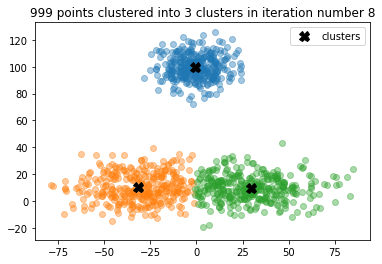

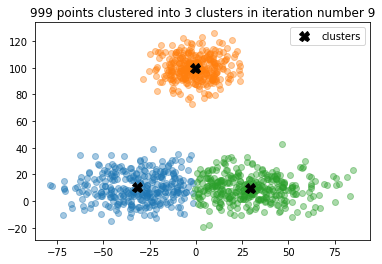

The score of best Kmeans clustering is: 333134.5219088101


In [9]:
K = 3
N = 10
points = initializePoints(1000)
plt.scatter(*zip(*points), color='red', alpha = 0.2, edgecolor='blue')
plt.title("INITIAL POINTS")
plt.show()
clusters = keepClustering(points,K,N,True)
print ("The score of best Kmeans clustering is:", clusterQuality(clusters))
